In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [3]:
imgs_list = glob.glob('../imgs_pdi/*')

In [4]:
imgs_list.sort()

In [5]:
for img in enumerate(imgs_list):
    print(img)

(0, '../imgs_pdi/aorta.jpg')
(1, '../imgs_pdi/bolas_original.png')
(2, '../imgs_pdi/conjunto-de-bola-colorida-dos-desenhos-animados-bolas-de-esporte-s-isolado_263016-1.jpg')
(3, '../imgs_pdi/cubo_magico.jpg')
(4, '../imgs_pdi/fpb.png')
(5, '../imgs_pdi/hsv_python.png')
(6, '../imgs_pdi/joelho.jpg')
(7, '../imgs_pdi/leao.jpeg')
(8, '../imgs_pdi/limao_amarelo.jpg')
(9, '../imgs_pdi/moedas04.jpg')
(10, '../imgs_pdi/montanha.jpg')
(11, '../imgs_pdi/paisagem.jpg')
(12, '../imgs_pdi/pedestres02.jpg')
(13, '../imgs_pdi/pelagem.jpg')
(14, '../imgs_pdi/pre-historia01.jpeg')
(15, '../imgs_pdi/pre-historia02.jpeg')
(16, '../imgs_pdi/psicopata.jpg')
(17, '../imgs_pdi/rainbow-fruits.jpg')


* Selecionar a imagem para todas as questões de acordo o index da lista acima

In [6]:
img_path = imgs_list[2]
img_gray = cv2.imread(img_path, 0)
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

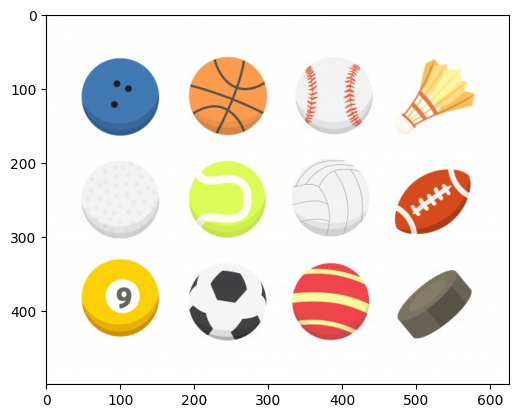

In [7]:
plt.imshow(img_rgb)

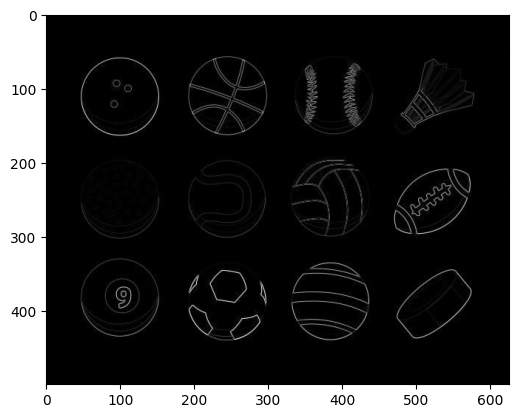

In [8]:
from scipy import ndimage
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
roberts_a = img_gray.astype('float64')
roberts_a/=255.0
#roberts_a_mean = cv2.medianBlur(roberts_a,3)
vertical = ndimage.convolve( roberts_a, roberts_cross_v )
horizontal = ndimage.convolve( roberts_a, roberts_cross_h )

borda_roberts_a = np.sqrt( np.square(horizontal) + np.square(vertical))
borda_roberts_a*=255

plt.imshow(borda_roberts_a, cmap='gray')


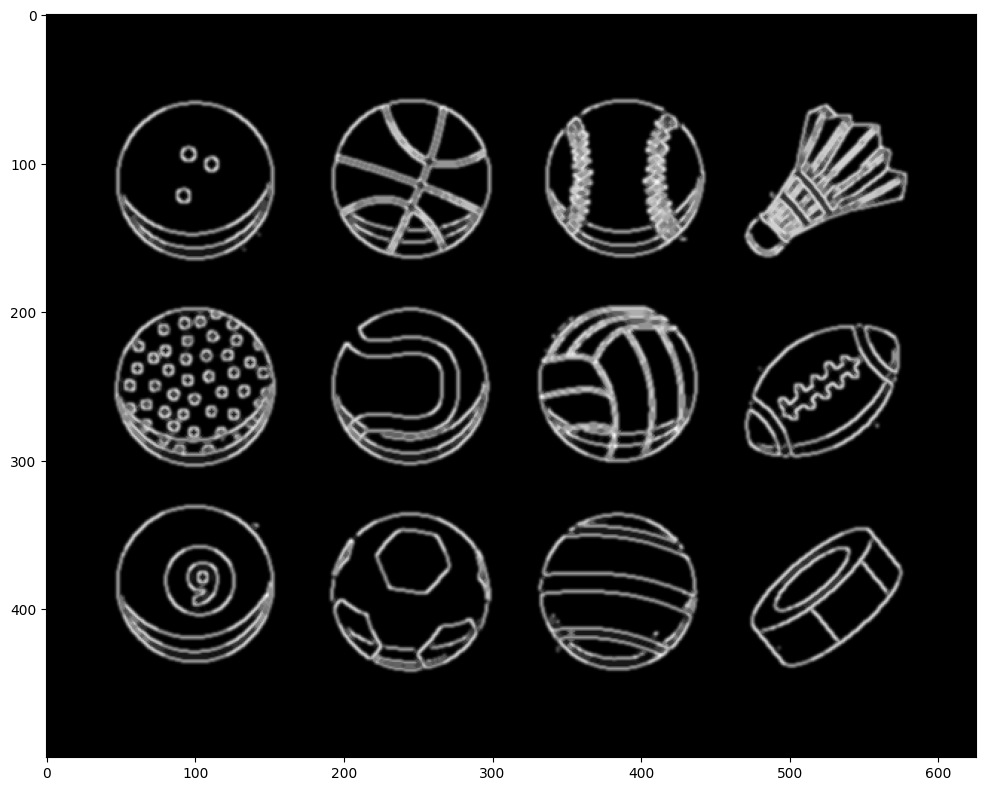

In [9]:
plt.figure(figsize=(12,12))
bordas = cv2.Canny(img_gray, 255, 255, apertureSize=5)

img = cv2.GaussianBlur(bordas, (5,5), 0)
kernelSize = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')

In [10]:
contours,hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

12

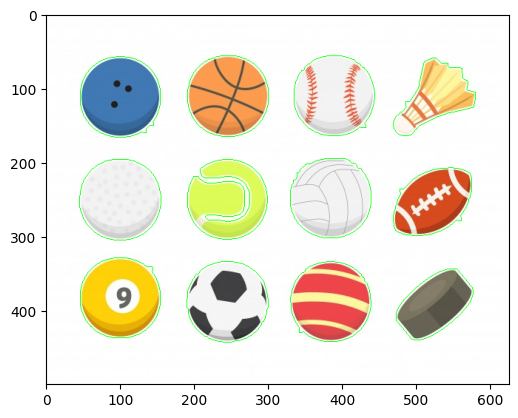

In [11]:
bordas2 = img_rgb.copy()
cv2.drawContours(bordas2, contours, -1, (0,255,0), 1)
plt.imshow(bordas2, cmap='gray')

In [12]:
def plot_object(i):
    cnt = contours[i]
    mask = np.zeros_like(img_rgb)
    mask[:,:,:] = 255
    cv2.drawContours(mask, [cnt], 0, (0, 0, 0), 1)
    cv2.fillPoly(mask, [cnt], color=(0,0,0))
    segmentation = cv2.bitwise_or(img_rgb, mask)
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    ax[0].axis('off')
    ax[0].imshow(mask)
    ax[1].axis('off')
    ax[1].imshow(segmentation) 

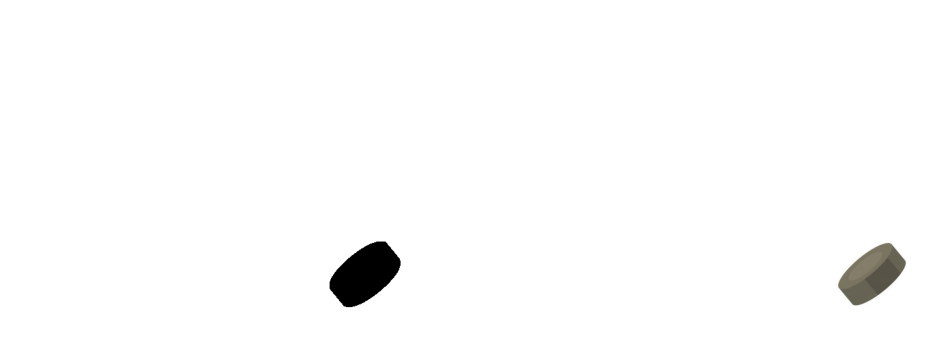

In [13]:
plot_object(0)

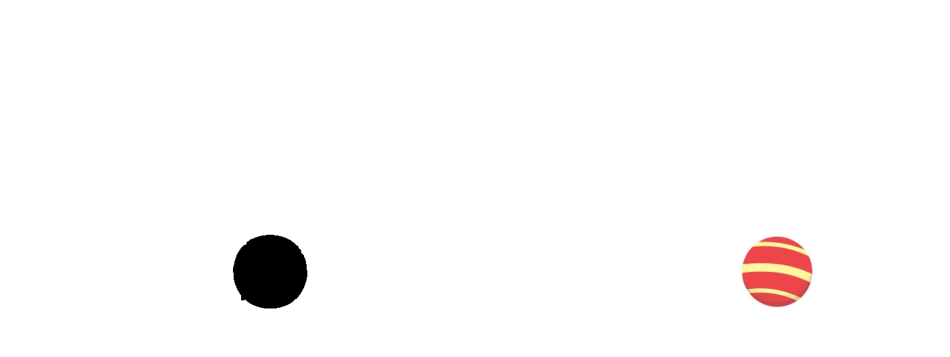

In [14]:
plot_object(1)

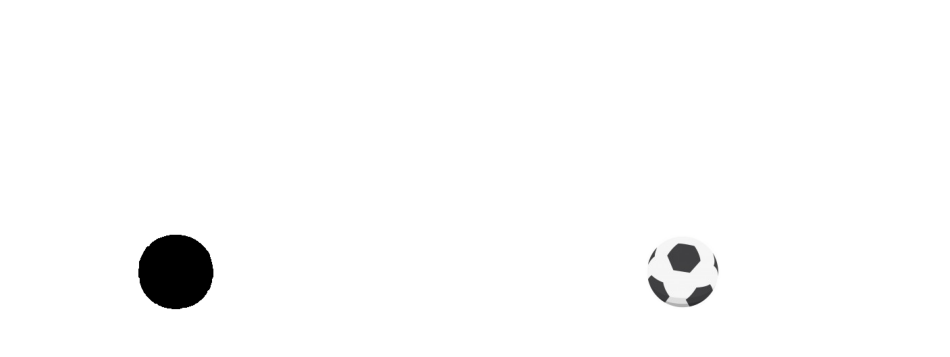

In [15]:
plot_object(2)

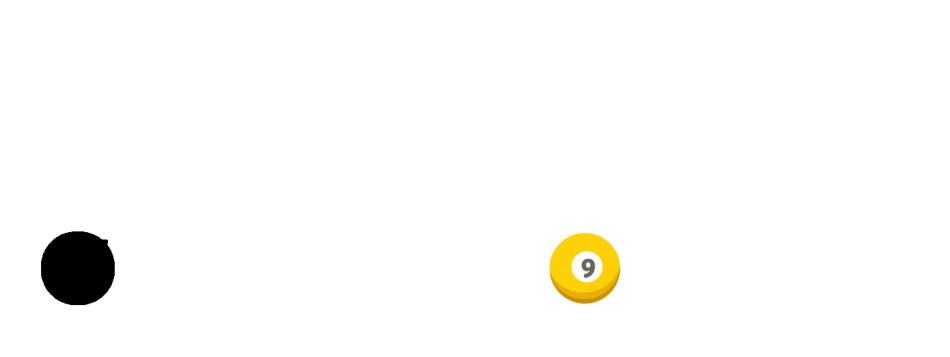

In [16]:
plot_object(3)

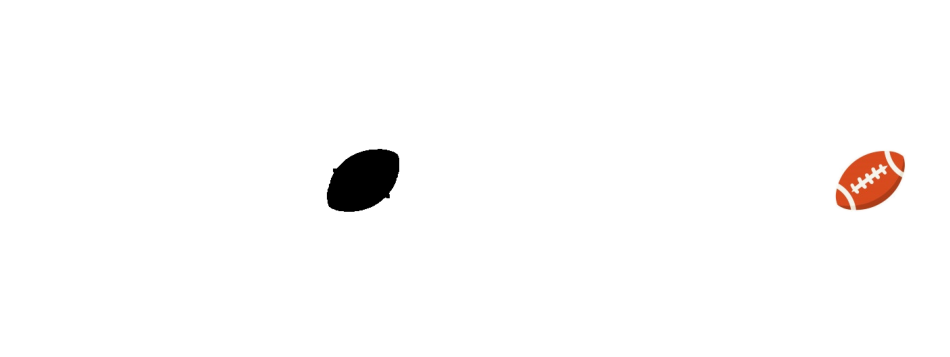

In [17]:
plot_object(4)

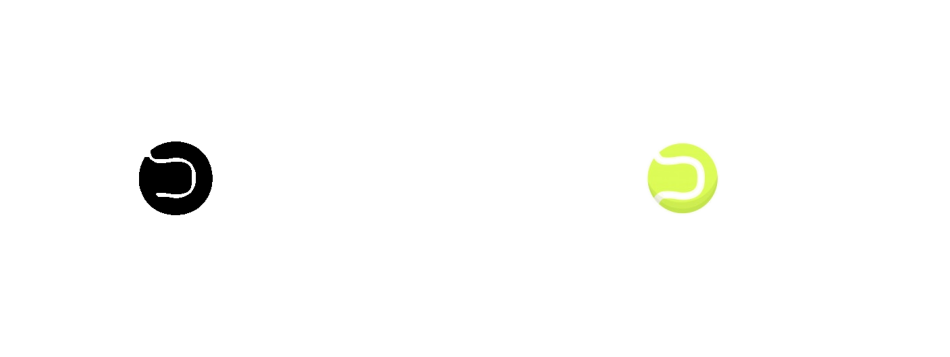

In [18]:
plot_object(5)

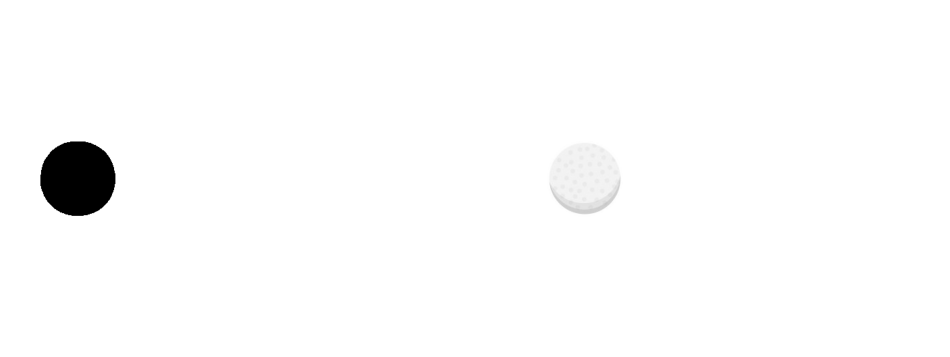

In [19]:
plot_object(6)

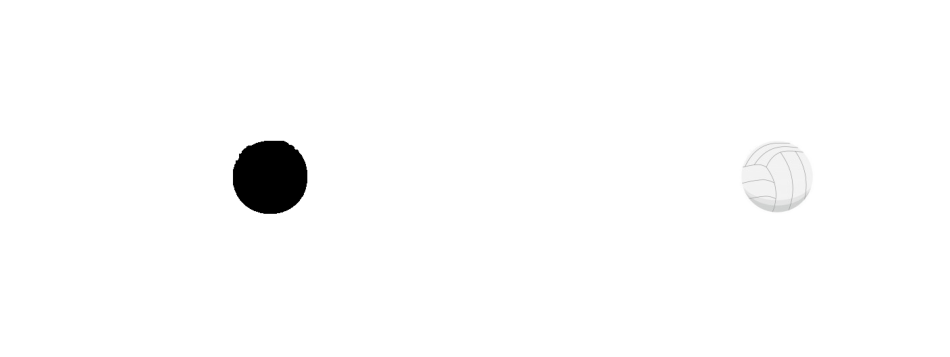

In [20]:
plot_object(7)

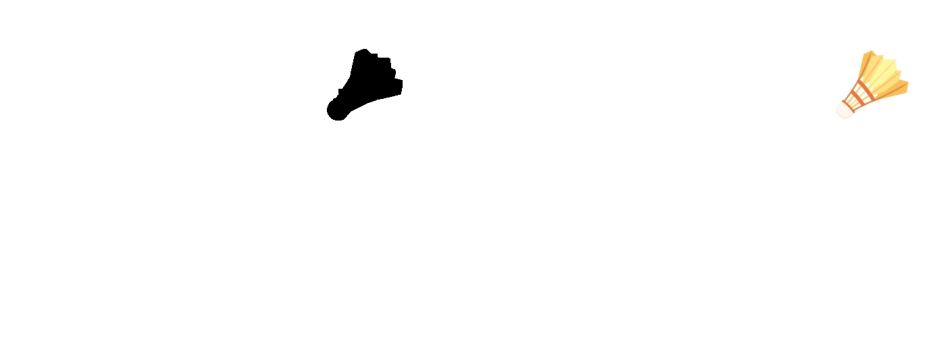

In [21]:
plot_object(8)

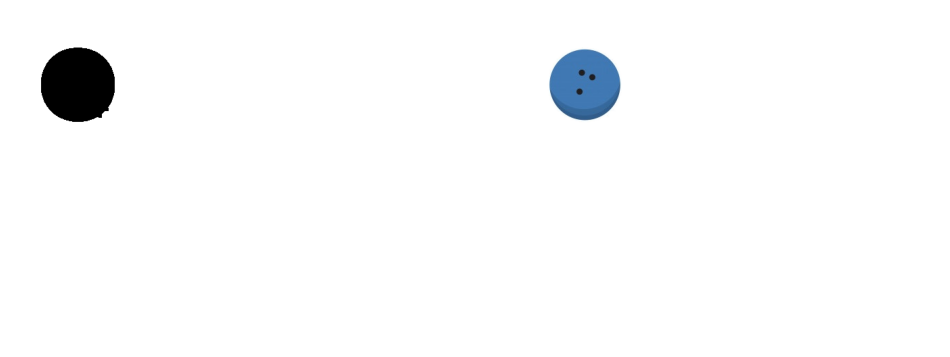

In [22]:
plot_object(9)

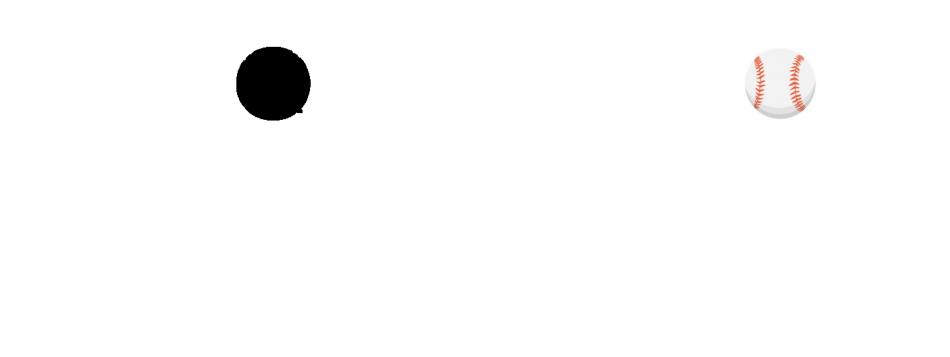

In [23]:
plot_object(10)

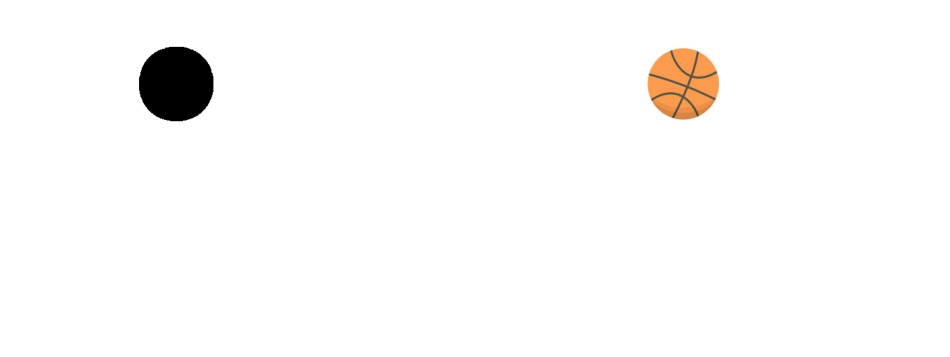

In [24]:
plot_object(11)

In [25]:
def add_border(src):
    top = int(0.05 * src.shape[0]) 
    bottom = top
    left = int(0.05 * src.shape[1]) 
    right = left
    value = [255, 255, 255]
    dst = cv2.copyMakeBorder(src, top, bottom, left, right, cv2.BORDER_CONSTANT, None, value)
    return dst

In [26]:
img_path = imgs_list[1]

img_gray = cv2.imread(img_path, 0)
img_gray = add_border(img_gray)

img_bgr = cv2.imread(img_path)
img_bgr = add_border(img_bgr)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

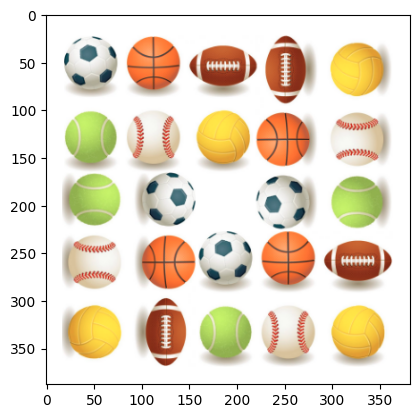

In [27]:
plt.imshow(img_rgb)

In [28]:
def gammaCorrection(src, gamma):
    
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

def laplaciano(src, kernel_size=(1,1)):
    src = cv2.GaussianBlur(src, kernel_size, 0)
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    ddepth = cv2.CV_16S
    kernel_size = 3
    dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
    abs_dst = cv2.convertScaleAbs(dst)
    return abs_dst

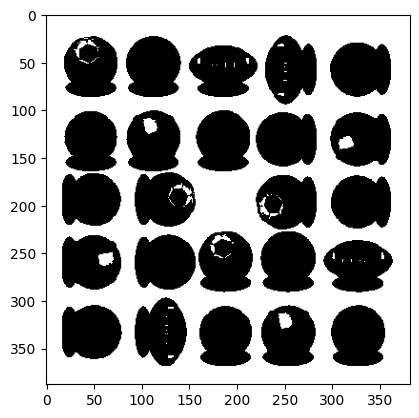

In [29]:
img_gray2 = img_gray.copy()
img_gray2 = gammaCorrection(img_gray2, 0.06)
limiar_gray , img_otsu = cv2.threshold(img_gray2,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_otsu, cmap='gray')

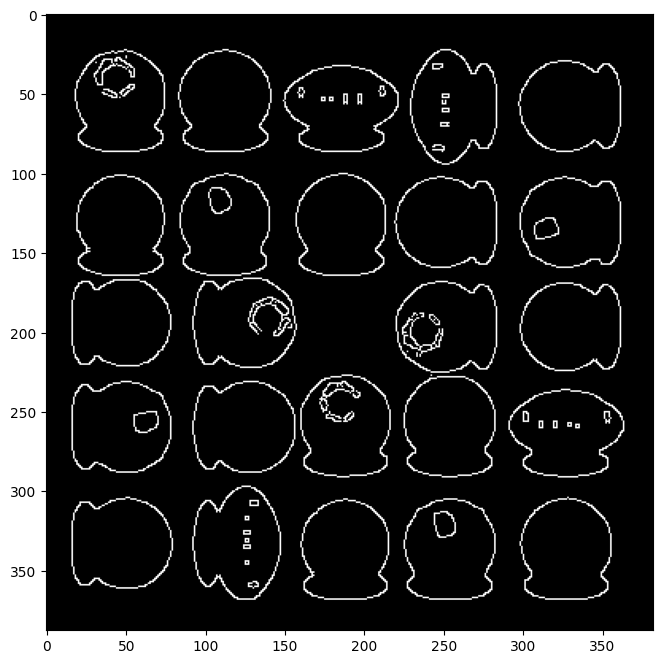

In [30]:
plt.figure(figsize=(8,8))
img = cv2.Canny(img_otsu, 100, 255, apertureSize=7)
img = cv2.blur(img, (1,1), 0)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))

# dilated = cv2.dilate(img, kernel, iterations=1)
# eroded = cv2.erode(img, kernel, iterations=1)
# img = dilated - eroded
#img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


plt.imshow(img, cmap='gray')

In [31]:
contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)

# for cnt in contours:

#     epsilon = 0.01*cv2.arcLength(cnt, True)
#     approx = cv2.approxPolyDP(cnt,epsilon,True)

#     cv2.drawContours(bordas2, [approx], -1, (0,255,0), 1)


25

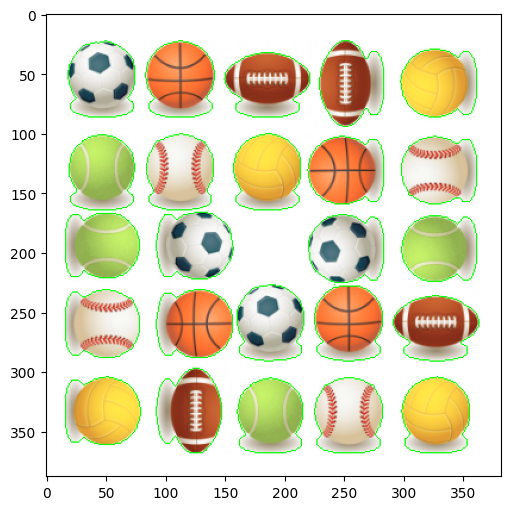

In [32]:
plt.figure(figsize=(6,6))
bordas2 = img_rgb.copy()



cv2.drawContours(bordas2, contours, -1, (0,255,0), 1)


plt.imshow(bordas2, cmap='gray')

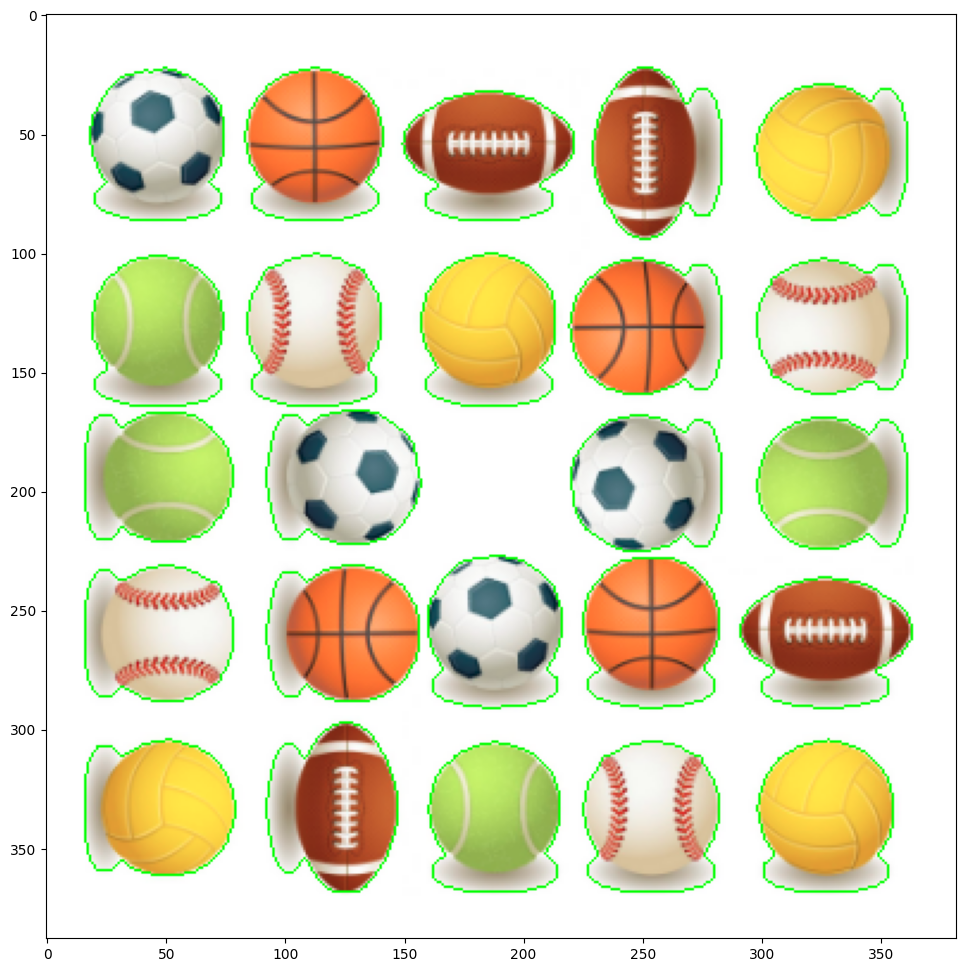

In [33]:
new_cnt = []
bordas2 = img_rgb.copy()
plt.figure(figsize=(12,12))
for i in range(len(contours)):
    cnt = contours[i]
    area = cv2.contourArea(cnt)
    if area > 20:
        new_cnt.append(cnt)
        cv2.drawContours(bordas2, contours, i, (0,255,0), 1)
plt.imshow(bordas2, cmap='gray')

In [34]:
len(new_cnt)

24

In [35]:
def plot_object(i, j, k, l):
    cnt = [new_cnt[i], new_cnt[j], new_cnt[k], new_cnt[l]]
    mask = np.zeros_like(img_rgb)
    mask[:,:,:] = 255
    cv2.drawContours(mask, cnt, 0, (0, 0, 0), 1)
    cv2.fillPoly(mask, cnt, color=(0,0,0))
    segmentation = cv2.bitwise_or(img_rgb, mask)
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    ax[0].axis('off')
    ax[0].imshow(mask)
    ax[1].axis('off')
    ax[1].imshow(segmentation)
    return mask
    

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

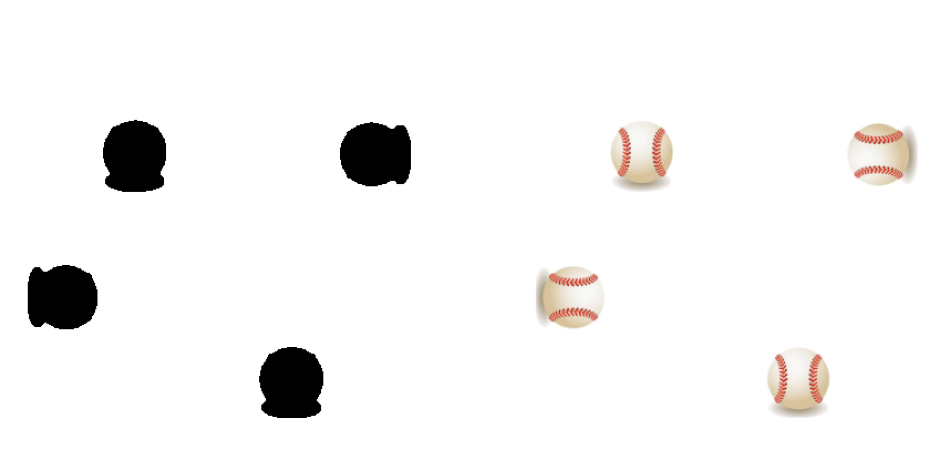

In [36]:
plot_object(0, 7, 14, 18)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

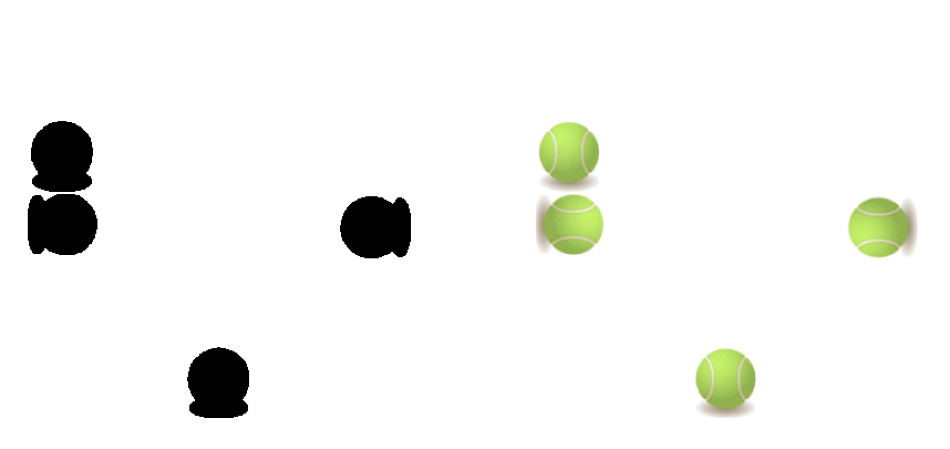

In [37]:
plot_object(1, 10, 12, 16)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

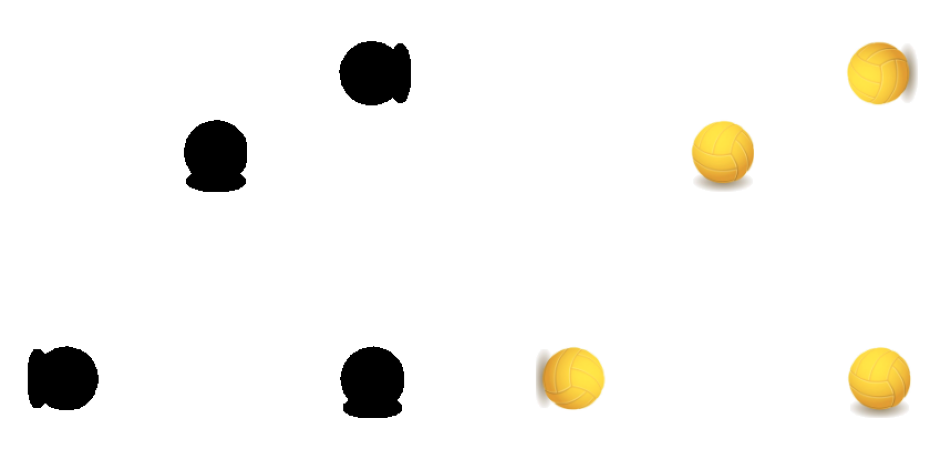

In [38]:
plot_object(2, 3, 17, 20)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

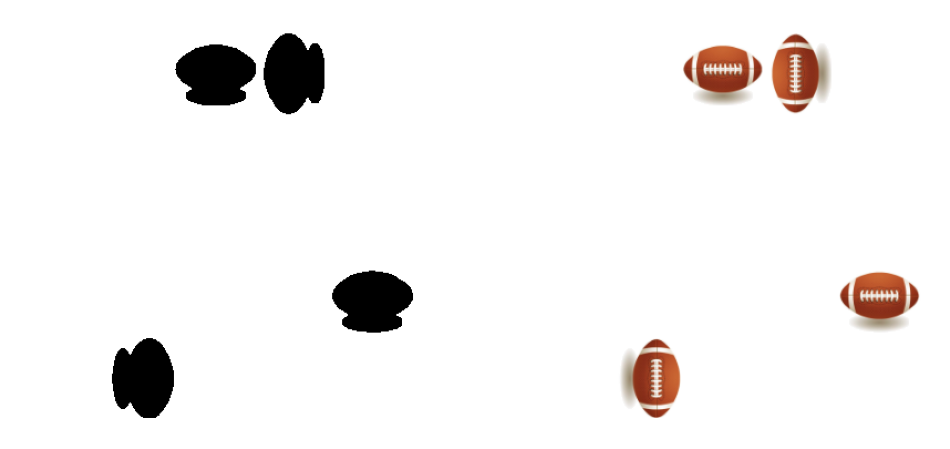

In [39]:
plot_object(4, 5, 19, 21)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

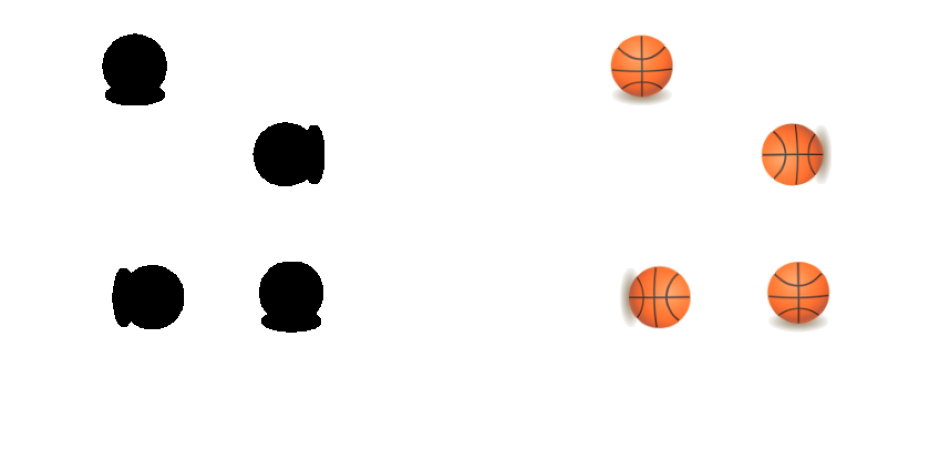

In [40]:
plot_object(6, 8, 15, 22)

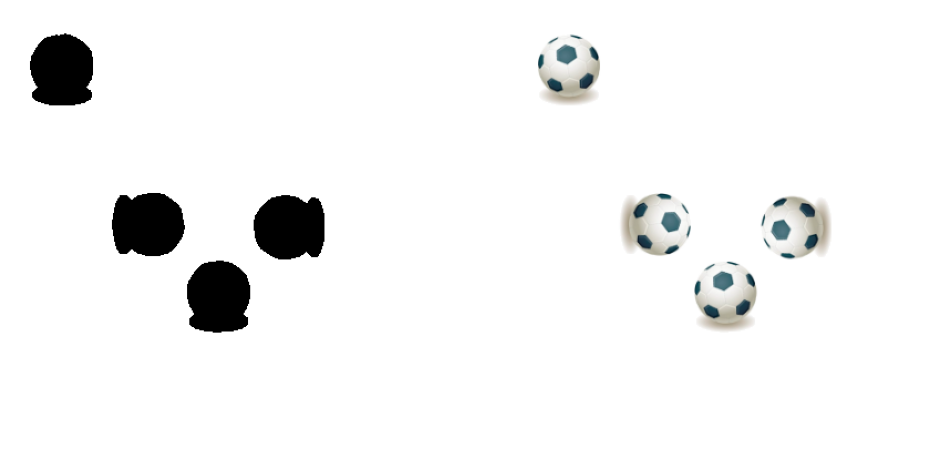

In [338]:
mask = plot_object(9, 11, 13, 23)

In [42]:
# 0 golf      # 7 golf    # 14 golf   # 18 golf

# 1 tenis     # 10 tenis  # 12 tenis  # 16 tenis

# 2 volei     # 3 volei  # 17 volei   # 20 volei

# 4 fa        # 5 fa     # 19 fa      # 21 fa

# 6 basquet  # 8 basquet # 15 basquet # 22 basquet


# 9 futebol # 11 futebol # 13 futebol # 23 futebol















# watershed

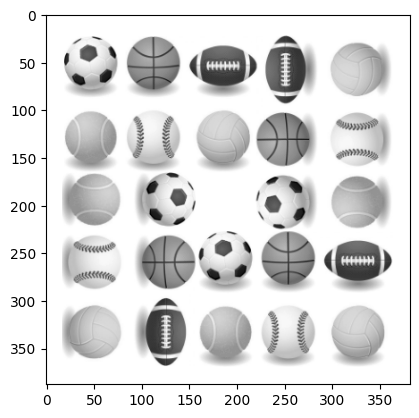

In [43]:
gray = img_gray.copy()
plt.imshow(gray, cmap='gray')

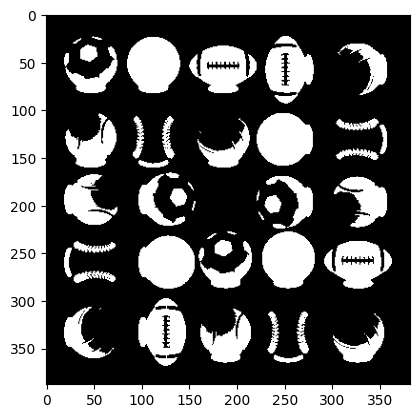

In [44]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

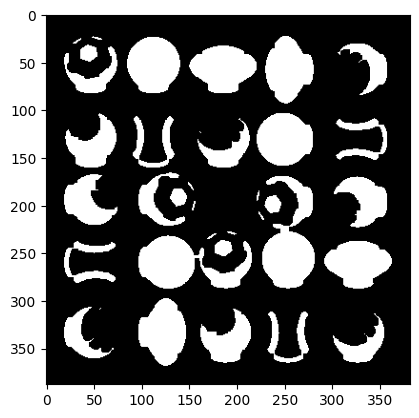

In [45]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

dilatacao = cv2.dilate(thresh, kernel, iterations=1)
seg = cv2.erode(dilatacao, kernel, iterations=1)    
plt.imshow(seg, cmap='gray')

In [46]:
seg.shape

(388, 382)

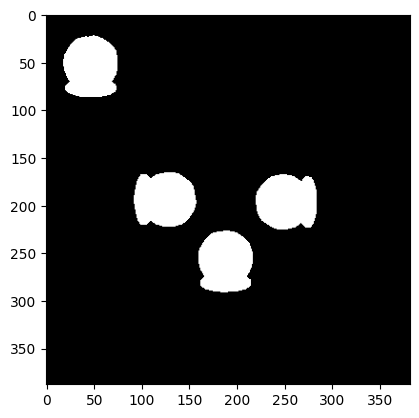

In [151]:
image_mask = np.zeros((mask.shape[0], mask.shape[1], 3), np.uint8)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j,:].tolist() == [255,255,255]:
            image_mask[i,j,:] = (0,0,0)
        else:
            image_mask[i][j][:] = (255,255,255)
plt.imshow(image_mask)       

In [48]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

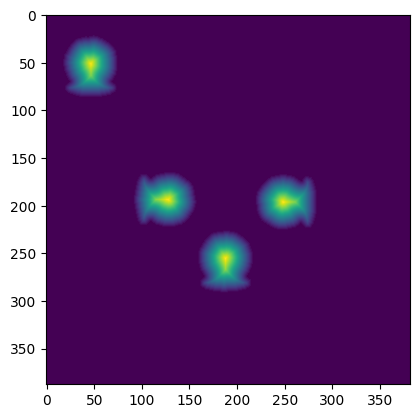

In [49]:
mask2 = cv2.cvtColor(image_mask, cv2.COLOR_RGB2GRAY)
dist = ndi.distance_transform_edt(mask2)
plt.imshow(dist)

In [50]:
local_max = peak_local_max(dist, indices = False, min_distance = 0, labels=mask2)

/tmp/ipykernel_11594/2872636475.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices = False, min_distance = 0, labels=mask2)
/home/pedrodsk/anaconda3/envs/pdi/lib/python3.8/site-packages/skimage/_shared/utils.py:157: RuntimeWarning: When min_distance < 1, peak_local_max acts as finding image > max(threshold_abs, threshold_rel * max(image)).
  return func(*args, **kwargs)


In [51]:
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
np.unique(markers, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([135785,   3102,   3119,   3111,   3099]))

In [52]:
labels = watershed(-dist, markers, mask=seg)
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [53]:
labels.shape

(388, 382)

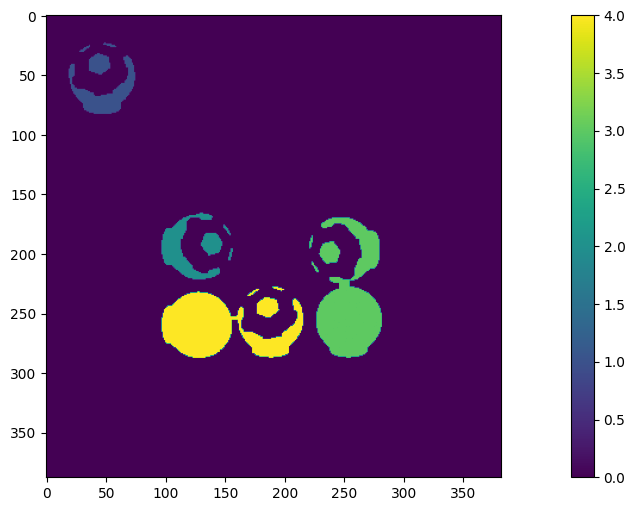

In [54]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plot = plt.imshow(labels)
plt.colorbar(plot)

In [362]:
img = cv2.medianBlur(img_gray, 3)
#img = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cimg = img_rgb.copy()
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=30, param2=65, minRadius=0, maxRadius=-1)
print(circles)
try:
    print(len(circles[0]))
except:
    pass

[[[127.5 259.5   0. ]
  [248.5 131.5   0. ]
  [254.5 255.5   0. ]
  [112.5  52.5   0. ]
  [128.5 195.5   0. ]
  [185.5 130.5   0. ]
  [187.5 333.5   0. ]
  [186.5 254.5   0. ]
  [252.5 333.5   0. ]
  [327.5  56.5   0. ]
  [112.5 129.5   0. ]
  [242.5 197.5   0. ]
  [ 50.5 194.5   0. ]
  [326.5 195.5   0. ]
  [326.5 132.5   0. ]
  [ 50.5 258.5   0. ]
  [ 49.5 334.5   0. ]
  [ 47.5  51.5   0. ]
  [328.5 333.5   0. ]
  [228.5  57.5   0. ]
  [ 48.5 128.5   0. ]
  [320.5 255.5   0. ]
  [185.5  30.5   0. ]
  [125.5 341.5   0. ]]]
24


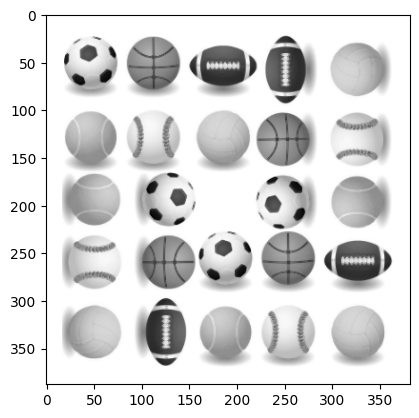

In [365]:
plt.imshow(img, cmap='gray')

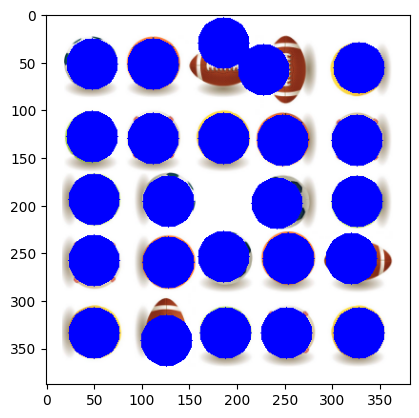

In [366]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0], i[1]), i[2], (0,255,0),2)
    cv2.circle(cimg,(i[0], i[1]), 2, (0,0,255),50)

plt.imshow(cimg)

### 